# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
#  Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):  #(cities[0:60])

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    ## Create endpoint URL with each city: 
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()
        

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")


            # Append the City information into city_data list
            city_data.append({"City": city_name,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Pressure": city_pressure,
                          "Country": city_country,
                          "Date": city_date})
        else:
            print(f"YO! The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | carutapera
Processing Record 4 of Set 1 | tongliao
Processing Record 5 of Set 1 | sao raimundo nonato
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | weno
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | poltavka
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | correntina
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | arak
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | bhamo
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | edin

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Pressure      590
Country       590
Date          590
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Sitka,57.0531,-135.3300,37.29,87,100,4.61,1018,US,1732703875
1,Bethel,41.3712,-73.4140,38.66,78,0,4.61,1016,US,1732703877
2,Carutapera,-1.1950,-46.0200,83.05,67,64,10.45,1012,BR,1732703878
3,Tongliao,43.6125,122.2653,17.37,72,98,10.02,1004,CN,1732703879
4,São Raimundo Nonato,-9.0153,-42.6994,79.68,70,51,9.04,1014,BR,1732703880


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Sitka,57.0531,-135.3300,37.29,87,100,4.61,1018,US,1732703875
1,Bethel,41.3712,-73.4140,38.66,78,0,4.61,1016,US,1732703877
2,Carutapera,-1.1950,-46.0200,83.05,67,64,10.45,1012,BR,1732703878
3,Tongliao,43.6125,122.2653,17.37,72,98,10.02,1004,CN,1732703879
4,São Raimundo Nonato,-9.0153,-42.6994,79.68,70,51,9.04,1014,BR,1732703880


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 0 to 589
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        590 non-null    object 
 1   Lat         590 non-null    float64
 2   Lng         590 non-null    float64
 3   Max Temp    590 non-null    float64
 4   Humidity    590 non-null    int64  
 5   Cloudiness  590 non-null    int64  
 6   Wind Speed  590 non-null    float64
 7   Pressure    590 non-null    int64  
 8   Country     589 non-null    object 
 9   Date        590 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 50.7+ KB


In [13]:
# Additional (not required) Date Cleaning w/dates:
df["Date"] = pd.to_datetime(df.Date * 1e9)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Sitka,57.0531,-135.3300,37.29,87,100,4.61,1018,US,2024-11-27 10:37:55
1,Bethel,41.3712,-73.4140,38.66,78,0,4.61,1016,US,2024-11-27 10:37:57
2,Carutapera,-1.1950,-46.0200,83.05,67,64,10.45,1012,BR,2024-11-27 10:37:58
3,Tongliao,43.6125,122.2653,17.37,72,98,10.02,1004,CN,2024-11-27 10:37:59
4,São Raimundo Nonato,-9.0153,-42.6994,79.68,70,51,9.04,1014,BR,2024-11-27 10:38:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

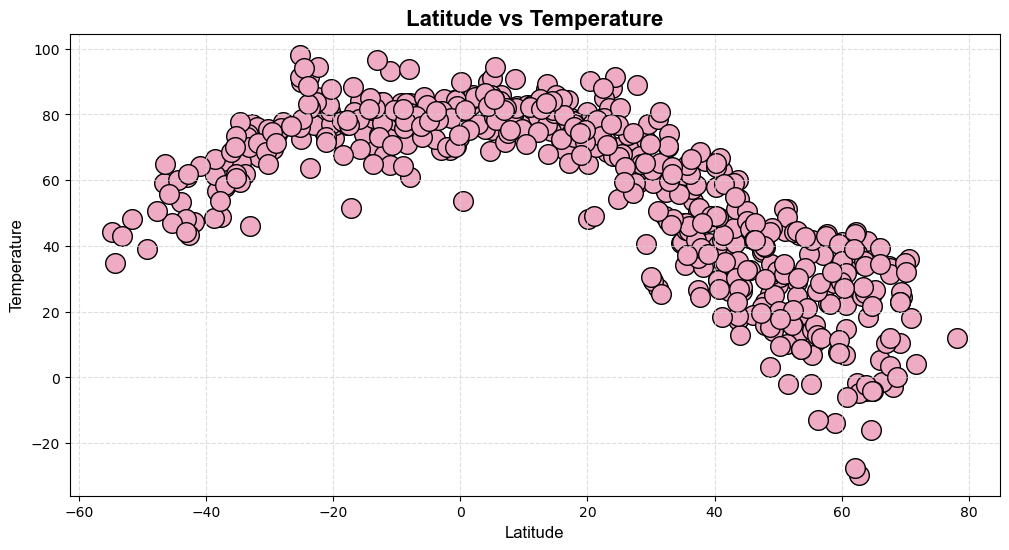

In [15]:
# Build scatter plot for latitude vs. temperature
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Max Temp"], color="#EFAAC4", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

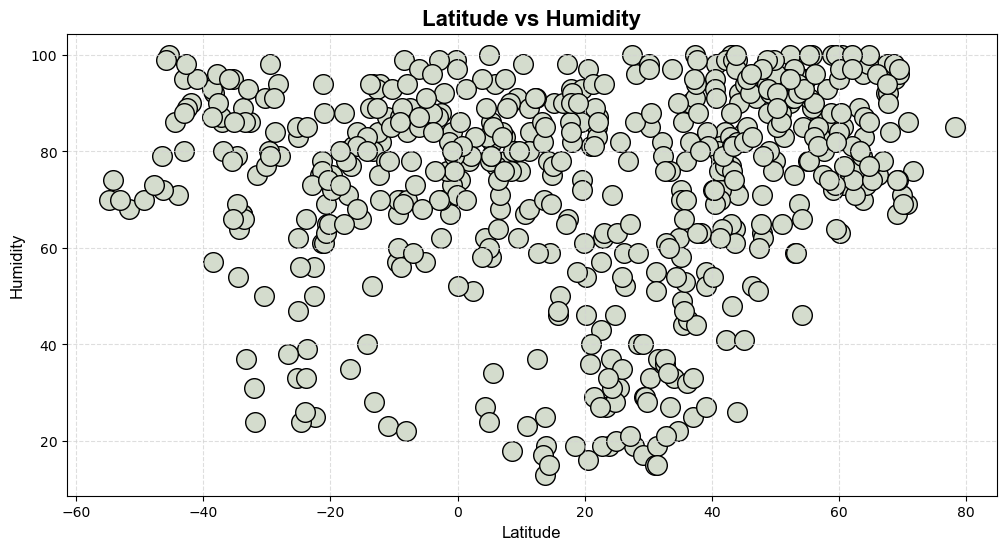

In [17]:
# Build the scatter plots for latitude vs. humidity
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df.Humidity, color="#D4DCCD", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

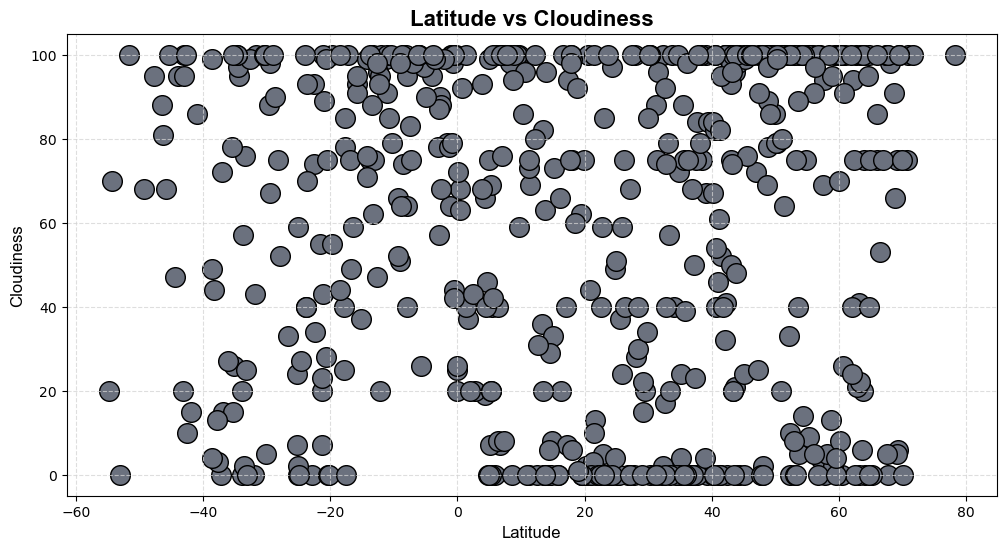

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df.Cloudiness, color="#6B717E", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

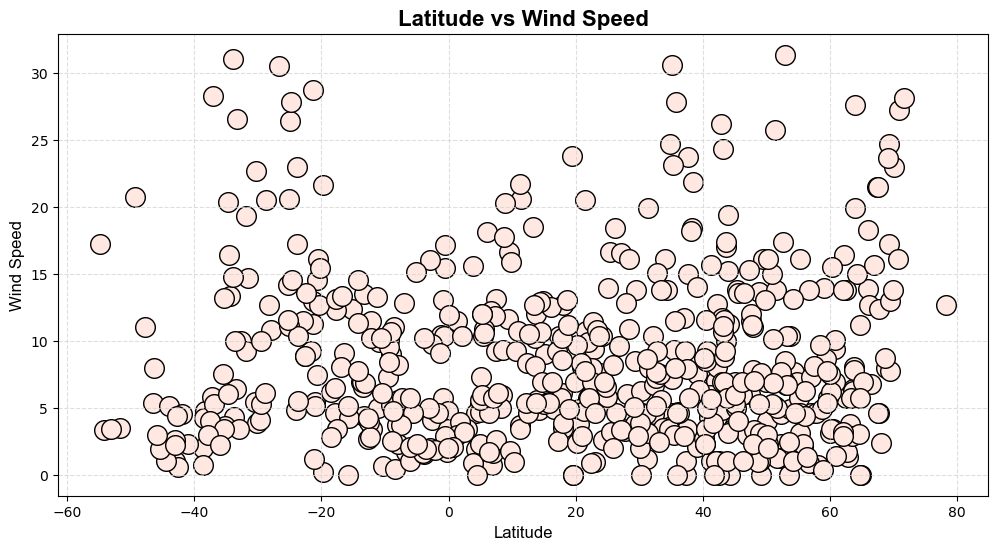

In [21]:
# Build the scatter plots for latitude vs. wind speed
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Wind Speed"], color="#FFE8E1", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):

        # Add the linear regression equation and line to plot
        #x_values = df.Lat
        #y_values = df["Max Temp"]
        
        # do regression
        (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept # these are the points/predictions
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        print(rvalue**2)
        print(line_eq)
    
        # make a scatter plot
        
        # Change Canvas Size
        plt.figure(figsize=(12, 6))
        
        # Create a basic plot
        plt.scatter( x_values,  y_values, color="#0077b6", edgecolor="black", s=200)
        plt.plot( x_values, regress_values, color="black", linewidth=6) # the regression line
        
        # Customizations
        
        # Change colors
        # Add in reference lines
        # Add Labels/Title
        plt.xlabel("x_label", fontfamily="Arial", fontsize=12)
        plt.ylabel("y_label", fontfamily="Arial", fontsize=12)
        plt.title(f"{x_label} vs  {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
        
        # Set X/Y Limits
        #plt.ylim(-20, 90)
        #plt.xlim(0, 70)
        
        # Add in a background grid
        plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
        
        # Annotate
        plt.annotate(line_eq, annotation, fontsize=15, color="black")
        
        # Show/Save the Graph
        plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=df.loc[df.Lat>=0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Sitka,57.0531,-135.3300,37.29,87,100,4.61,1018,US,2024-11-27 10:37:55
1,Bethel,41.3712,-73.4140,38.66,78,0,4.61,1016,US,2024-11-27 10:37:57
2,Tongliao,43.6125,122.2653,17.37,72,98,10.02,1004,CN,2024-11-27 10:37:59
3,Aykhal,66.0000,111.5000,5.14,97,86,13.87,1006,RU,2024-11-27 10:38:01
4,Weno,7.4515,151.8468,82.35,83,100,9.22,1009,FM,2024-11-27 10:38:02


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=df.loc[df.Lat<0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Carutapera,-1.1950,-46.0200,83.05,67,64,10.45,1012,BR,2024-11-27 10:37:58
1,São Raimundo Nonato,-9.0153,-42.6994,79.68,70,51,9.04,1014,BR,2024-11-27 10:38:00
2,Grytviken,-54.2811,-36.5092,34.88,74,70,3.36,988,GS,2024-11-27 10:38:03
3,Ushuaia,-54.8000,-68.3000,44.26,70,20,17.27,1014,AR,2024-11-27 10:35:17
4,Correntina,-13.3433,-44.6367,70.29,94,100,4.41,1015,BR,2024-11-27 10:38:10


###  Temperature vs. Latitude Linear Regression Plot

0.7465435687071525
y = -1.18x + 92.56


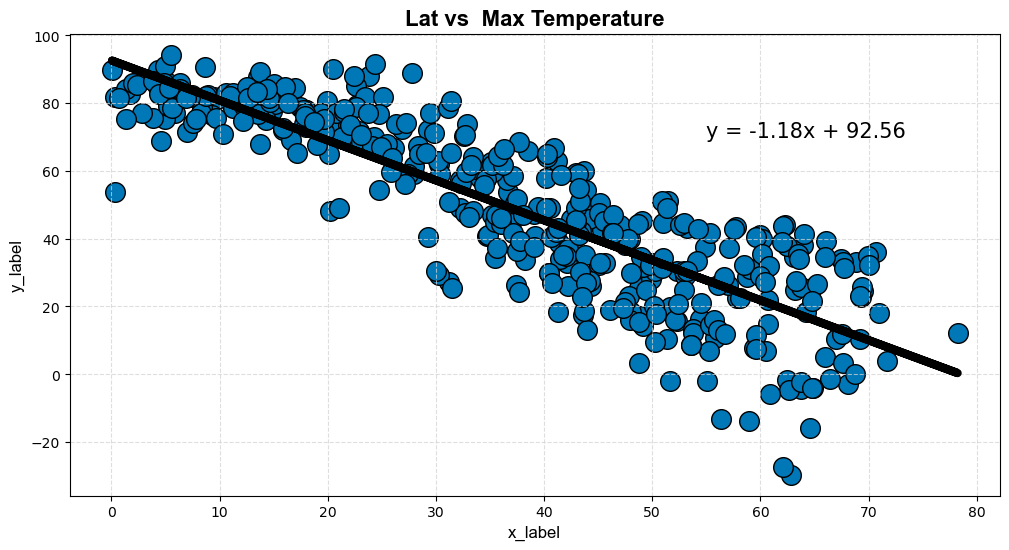

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values=northern_hemi_df["Max Temp"]
x_label = "Lat"
y_label = "Max Temperature"
annotation = (55,70)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)


0.43963027196850074
y = 0.56x + 84.87


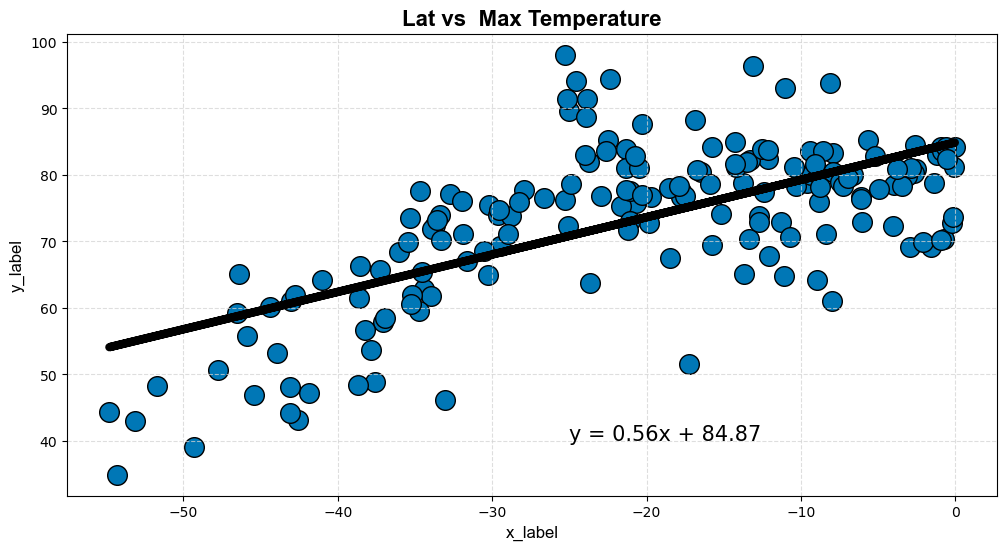

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values=southern_hemi_df["Max Temp"]
x_label = "Lat"
y_label = "Max Temperature"
annotation = (-25,40)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is a strong positive relationship betwwen temperature and latitude. For example the temperature drops from the south of the equator, the Southern Hemispher to the north of the equator, located in the Northern Hemisphere. It's cold in the north.

### Humidity vs. Latitude Linear Regression Plot

0.1039080503416791
y = 0.38x + 59.42


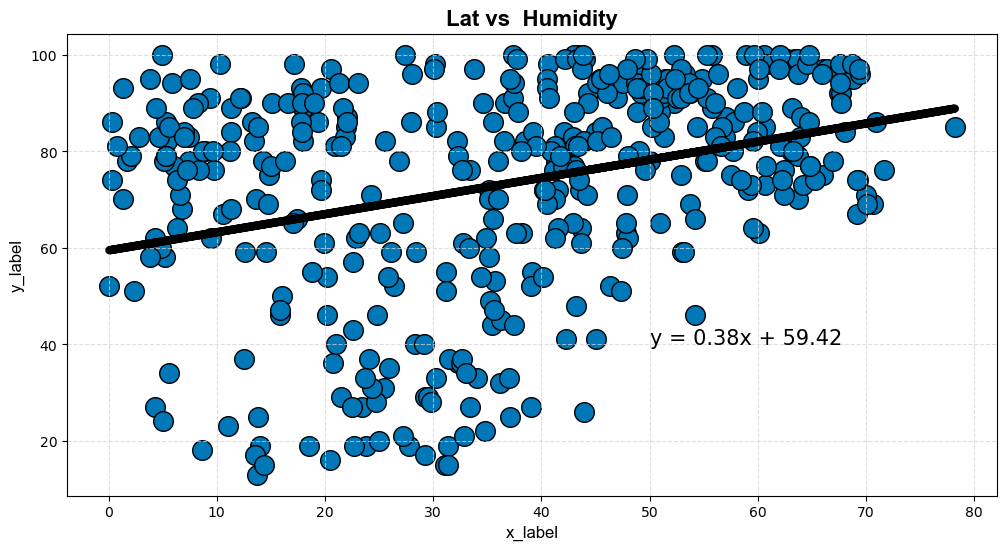

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values=northern_hemi_df.Humidity
x_label = "Lat"
y_label = "Humidity"
annotation = (50,40)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

3.005563206065824e-05
y = 0.01x + 74.8


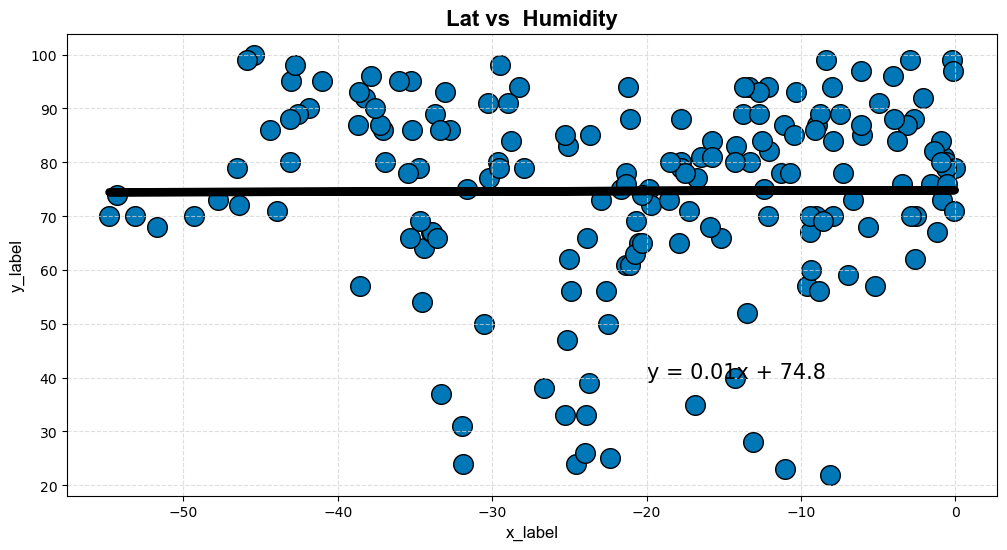

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values=southern_hemi_df.Humidity
x_label = "Lat"
y_label = "Humidity"
annotation = (-20,40)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is no relationship here

### Cloudiness vs. Latitude Linear Regression Plot

0.030928824066456896
y = 0.38x + 40.79


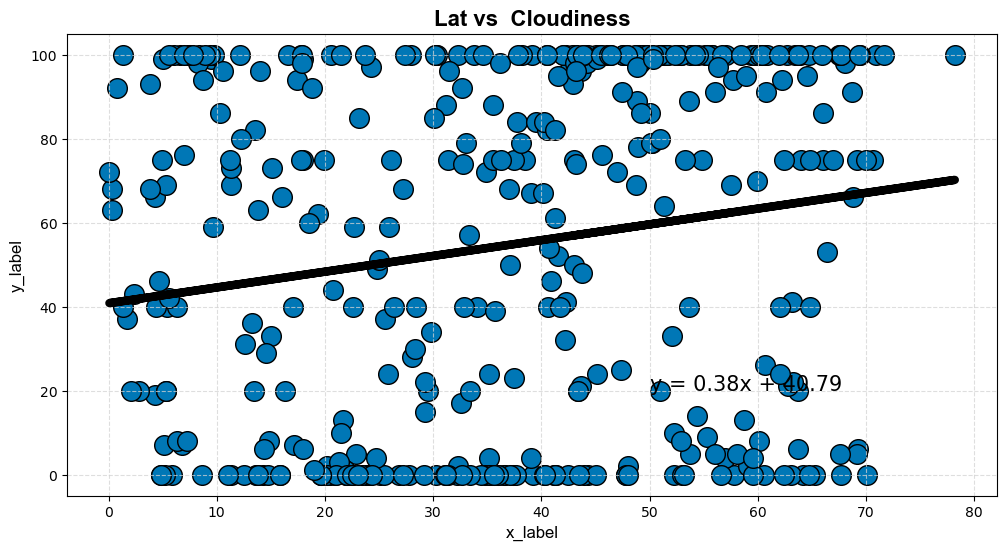

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values=northern_hemi_df.Cloudiness
x_label = "Lat"
y_label = "Cloudiness"
annotation = (50,20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.07278362903706877
y = 0.66x + 79.49


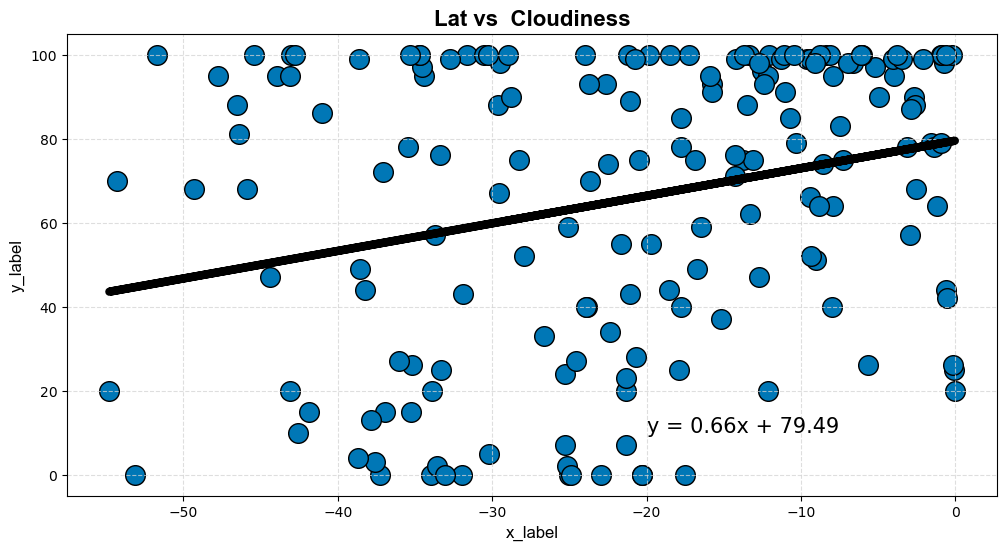

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values=southern_hemi_df.Cloudiness
x_label = "Lat"
y_label = "Cloudiness"
annotation = (-20,10)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is no relationship here

### Wind Speed vs. Latitude Linear Regression Plot

0.0084296580416899
y = 0.03x + 7.17


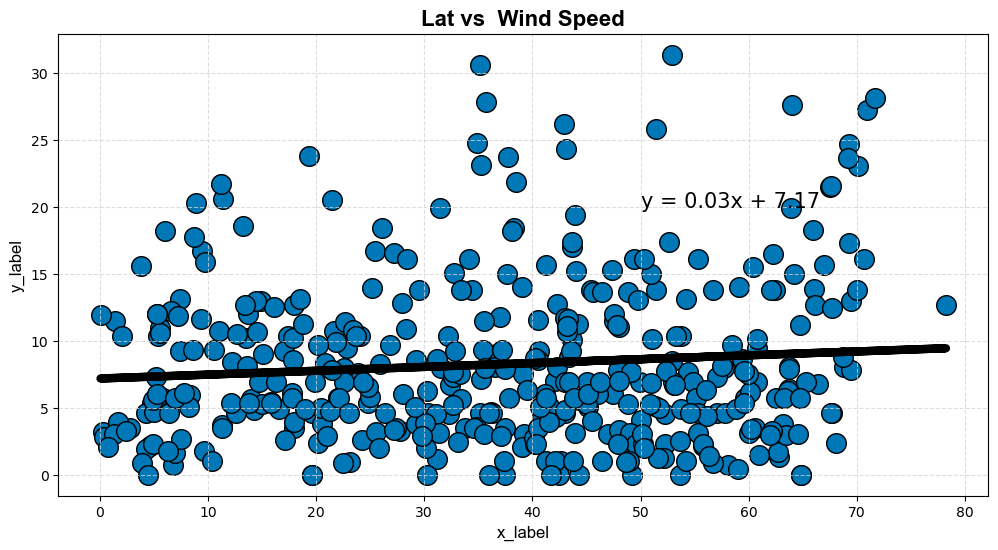

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values=northern_hemi_df["Wind Speed"]
x_label = "Lat"
y_label = "Wind Speed"
annotation = (50,20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.011927603909682522
y = -0.05x + 7.48


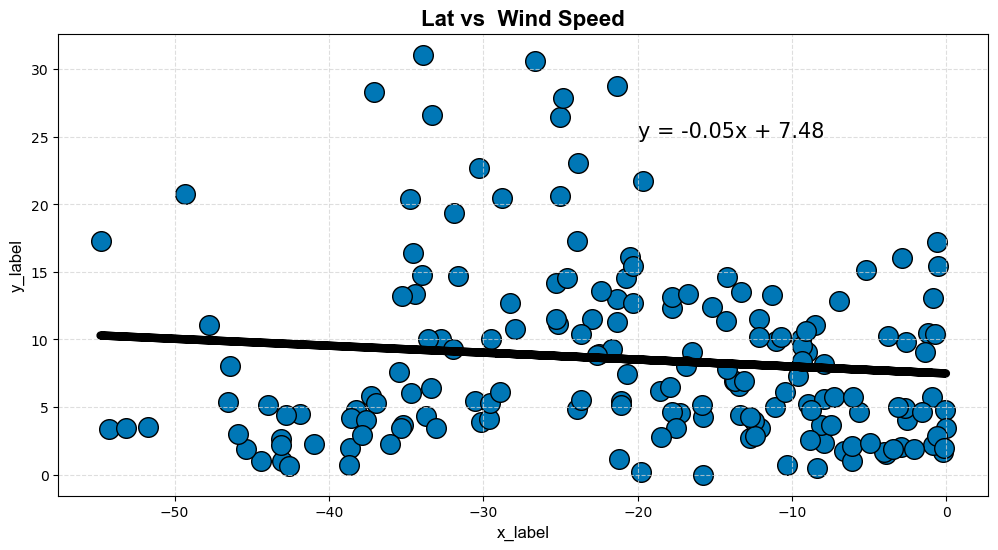

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values=southern_hemi_df["Wind Speed"]
x_label = "Lat"
y_label = "Wind Speed"
annotation = (-20,25)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is almost no relationship